<a href="https://colab.research.google.com/github/hasanasyarie/MSIB-Orbit-Future-Academy/blob/main/TA_ORBIT_ASL_Classification_using_CNN_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Import Library**

In [ ]:
import os
import cv2
import numpy as np
from time import time
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from PIL import Image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from google.colab import files
import zipfile
from google.colab import drive
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

###**Load Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir = '/content/drive/MyDrive/last projek orbit/Dataset/asl_alphabet_train'
test_dir = '/content/drive/MyDrive/last projek orbit/Dataset/asl_alphabet_test'

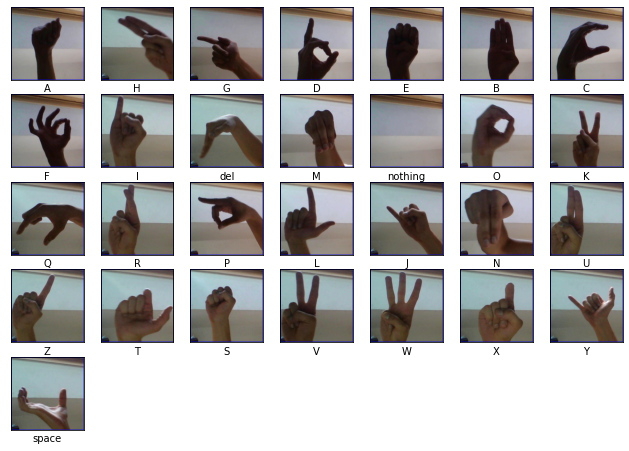

In [ ]:
classes = os.listdir(base_dir)

plt.figure(figsize=(11, 11))
for i in range (0,29):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    path = base_dir + "/{0}/{0}1.jpg".format(classes[i])
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(classes[i])

###**Preprocessing Data**

In [ ]:
def load_data(base_dir):
    images = []
    labels = []
    size = 64,64
    index = -1
    for folder in os.listdir(base_dir):
        index +=1
        for image in os.listdir(base_dir + "/" + folder):
            temp_img = cv2.imread(base_dir + '/' + folder + '/' + image)
            temp_img = cv2.resize(temp_img, size)
            images.append(temp_img)
            labels.append(index)
    
    images = np.array(images)
    images = images.astype('float32')/255.0
    labels = utils.to_categorical(labels)
    x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.25) #memisahkan data yang akan dilatih dan diuji dengan data ujinya sebesar 25% dari jumlah data keseluruhan
    
    #Menampilkan jumlah data yang akan dilatih dan diuji
    print('Loaded', len(x_train),'images for training,','Train data shape =', x_train.shape)
    print('Loaded', len(x_test),'images for testing','Test data shape =', x_test.shape)
    
    return x_train, x_test, y_train, y_test

start = time()
x_train, x_test, y_train, y_test = load_data(base_dir)
print('Loading:', time() - start)

###**Arsitektur**

In [ ]:
x_test = np.load('/content/drive/MyDrive/last projek orbit/Dataset/asl_alphabet_train/x_test1.npy')
x_train = np.load('/content/drive/MyDrive/last projek orbit/Dataset/asl_alphabet_train/x_train1.npy')
y_test = np.load('/content/drive/MyDrive/last projek orbit/Dataset/asl_alphabet_train/y_test1.npy')
y_train = np.load('/content/drive/MyDrive/last projek orbit/Dataset/asl_alphabet_train/y_train1.npy')

In [ ]:
classes = 29
batch = 64
epochs = 10
learning_rate = 0.005

def results(model):
  adam = Adam(lr=learning_rate)

  model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

  start = time()
  history = model.fit(x_train,
                      y_train,
                      batch_size=batch,
                      epochs=epochs,
                      validation_split=0.20,
                      shuffle = True, verbose=1)
  train_time = time() - start

  model.summary()

  plt.figure(figsize=(12, 12))
  plt.subplot(3, 2, 1)
  plt.plot(history.history['accuracy'], label = 'train_accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.subplot(3, 2, 2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend()
  plt.show()

  start = time()
  test_loss, test_acc = model.evaluate(x_test, y_test)
  test_time = time() - start
  print('\nTrain time: ', train_time)
  print('Test accuracy:', test_acc)
  print('Test loss:', test_loss)
  print('Test time: ', test_time)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
816/816 [==============================] - 36s 27ms/step - loss: 1.7473 - accuracy: 0.4824 - val_loss: 1.2398 - val_accuracy: 0.6001
Epoch 2/10
816/816 [==============================] - 20s 25ms/step - loss: 0.5743 - accuracy: 0.8093 - val_loss: 0.3966 - val_accuracy: 0.8675
Epoch 3/10
816/816 [==============================] - 20s 25ms/step - loss: 0.3920 - accuracy: 0.8677 - val_loss: 0.4399 - val_accuracy: 0.8634
Epoch 4/10
816/816 [==============================] - 20s 25ms/step - loss: 0.2979 - accuracy: 0.8989 - val_loss: 0.7692 - val_accuracy: 0.7789
Epoch 5/10
816/816 [==============================] - 22s 27ms/step - loss: 0.3038 - accuracy: 0.9000 - val_loss: 0.2961 - val_accuracy: 0.9051
Epoch 6/10
816/816 [==============================] - 21s 26ms/step - loss: 0.2898 - accuracy: 0.9064 - val_loss: 0.3980 - val_accuracy: 0.8793
Epoch 7/10
816/816 [==============================] - 20s 25ms/step - loss: 0.2632 - accuracy: 0.9136 - val_loss: 0.4348 - val_accuracy:

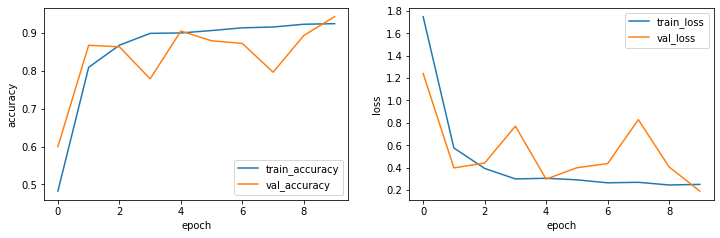

680/680 [==============================] - 4s 5ms/step - loss: 0.2008 - accuracy: 0.9390

Train time:  265.92488050460815
Test accuracy: 0.9390344619750977
Test loss: 0.20084282755851746
Test time:  6.5119993686676025


In [ ]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(classes, activation='softmax'))

results(model)

Input img shape: (1, 64, 64, 3)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[[8.95316989e-05 1.73266505e-38 1.02593585e-23 8.97789127e-14\n  1.76628318e-03 5.73182537e-15 4.15612628e-10 8.83067131e-01\n  4.99631744e-15 3.12301157e-10 6.62985398e-03 3.58346711e-29\n  7.95425731e-05 2.82896476e-22 1.60934986e-04 1.40538162e-18\n  1.82076619e-12 7.23228339e-08 1.15091887e-24 1.08928708e-02\n  6.06712488e-14 1.06108589e-08 2.66535785e-02 7.06036463e-02\n  2.15898724e-15 1.14913051e-10 3.85668818e-06 5.27343655e-05\n  2.22497323e-15]]')

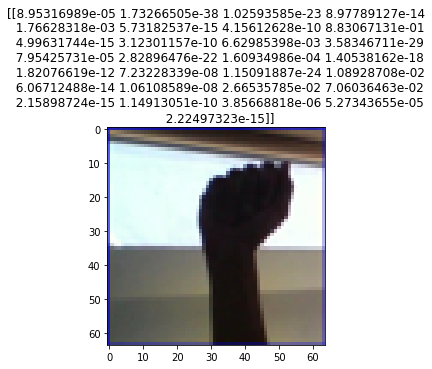

In [ ]:
# FOR TESTING YOUR OWN IMAGE

img_path= test_dir + '/A_test.jpg'
img=image.load_img(img_path,target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=x/255
print('Input img shape:',x.shape)

my_img=Image.open(img_path)
my_img=my_img.resize((64,64))
plt.imshow(my_img)
pred=model.predict(x)
plt.title(pred)